In [1]:
import h5py
import os

import fenics as fe
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import sys
sys.path.insert(0, "../scripts/")

from ns_2d import NSSemiImplicit, NSSplit

fe.set_log_level(40)

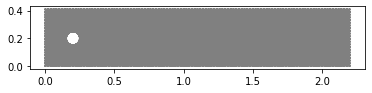

In [2]:
mesh = "../mesh/featflow-2d-3-benchmark.xdmf"
ns = NSSemiImplicit(mesh, dict(dt=1/1000))
ns.setup_form()

ns_split = NSSplit(mesh, dict(dt=1/1000))
ns_split.setup_form()
ns_split.solve()

assert ns.t == ns_split.t

fe.plot(ns.mesh)
plt.show()

ns.setup_form()

In [3]:
t_final = 0.2
nt = int((t_final - ns.t) / ns.dt)
for i in tqdm(range(nt)):
    ns.solve()
    ns_split.solve()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [01:52<00:00,  1.76it/s]


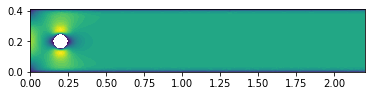

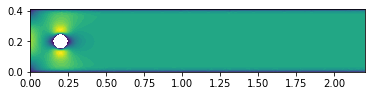

0.00038631238681266185


In [4]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.show()

fe.plot(fe.split(ns_split.u)[0])
plt.show()

print(fe.errornorm(ns.du.split()[0], ns_split.u))

In [4]:
# re-initialize and run through again
ns = NSSemiImplicit(mesh, dict(dt=1/1000))
ns.setup_form()

ns_split = NSSplit(mesh, dict(dt=1/1000))
ns_split.setup_form()
ns_split.solve()

nt = int((0.2 - ns.t) / ns.dt)
for i in tqdm(range(nt)):
    ns.solve(krylov=True)
    ns_split.solve(krylov=True)

  0%|                                                                                                                                                             | 0/199 [08:20<?, ?it/s]

  0 KSP preconditioned resid norm 1.070152329386e-01 true resid norm 9.392566044406e-03 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 5.271509761906e-03 true resid norm 3.609278050543e-05 ||r(i)||/||b|| 3.842696483026e-03
  2 KSP preconditioned resid norm 3.651189310794e-03 true resid norm 2.386623162945e-05 ||r(i)||/||b|| 2.540970328728e-03
  3 KSP preconditioned resid norm 7.622666645438e-07 true resid norm 1.061315944712e-08 ||r(i)||/||b|| 1.129953134952e-06
  4 KSP preconditioned resid norm 9.860196366434e-10 true resid norm 7.237513475486e-09 ||r(i)||/||b|| 7.705576347581e-07
KSP Object: 1 MPI processes
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=1000, initial guess is zero
  tolerances:  relative=1e-07, absolute=1e-10, divergence=10000.
  left preconditioning
  using PRECONDITIONED norm type for convergence test
PC Object: 1 MPI

KeyboardInterrupt: 

In [ ]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.title("Semi-implicit")
plt.show()

fe.plot(fe.split(ns_split.u)[0])
plt.title("Operator splitting")
plt.show()

print(fe.errornorm(ns.du.split()[0], ns_split.u))